In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

In [4]:
db=pd.read_csv('creditcard.csv')
db.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


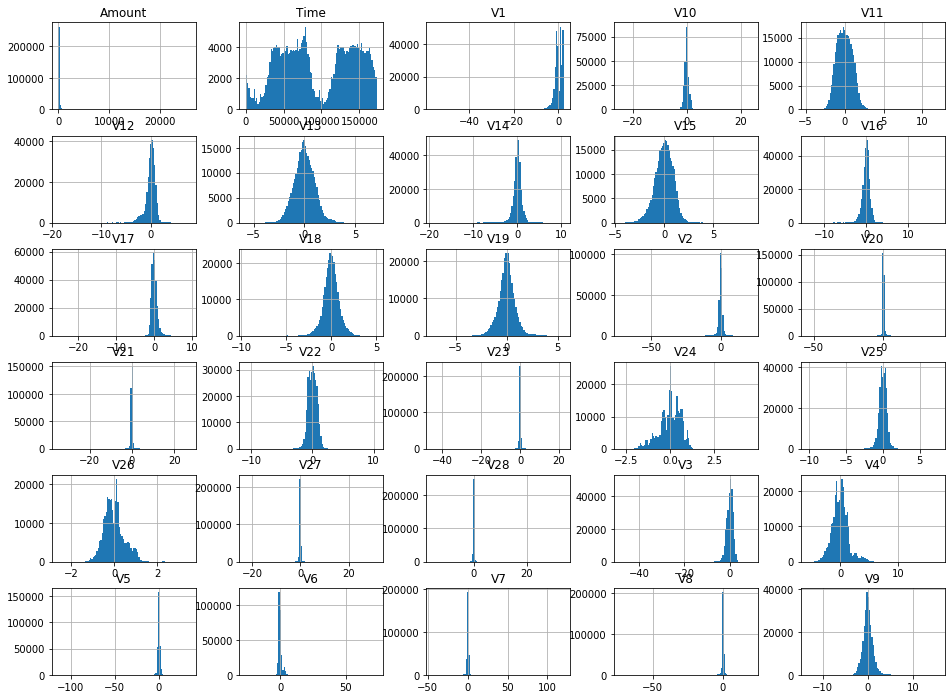

In [5]:
## visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
fig,axis=plt.subplots(6,5,figsize=(16,12))
a=db.iloc[:,:-1].hist(ax=axis,bins=100)

In [6]:
X=db.iloc[:,:-1].values 
Y=db.iloc[:,-1].values
print(X.shape)

(284807, 30)


In [7]:
print(str(db['Amount'].mean()))  #mean amount of transaction is 88.35
print('Mean of fraudelent transaction: '+ str(db.loc[db['Class']==1,['Amount']].mean()))

88.34961925087359
Mean of fraudelent transaction: Amount    122.211321
dtype: float64


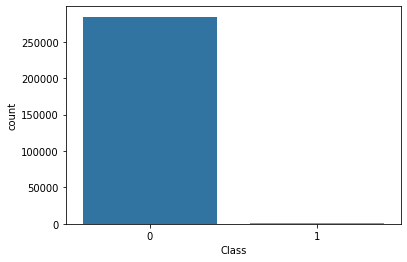

In [8]:
sb.countplot(db['Class'].astype(dtype='category')) #below plot shows highly skewed data

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11) #splitting data to do logistic regression

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print("Percentange distribtuion of positive class in train "+str(np.sum(y_train==1)*100/y_train.shape[0]))
print("Percentange distribtuion of positive class in test set "+str(np.sum(y_test==1)*100/y_test.shape[0]))
#this is to make sure % of minority class is similar in both test and train dataset

(199364, 30)
(85443, 30)
(85443,)
Percentange distribtuion of positive class in train 0.16703115908589314
Percentange distribtuion of positive class in test set 0.1860889715950985


In [11]:
print("Total percentage of no fraud "+str((sum(db['Class']==0)/db.shape[0])*100)+"%")
print("Total percentage of no fraud "+str((sum(db['Class']==1)/db.shape[0])*100)+"%")

Total percentage of no fraud 99.82725143693798%
Total percentage of no fraud 0.1727485630620034%


In [12]:
logistic=LogisticRegression(max_iter=1000,class_weight=None, random_state=11)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=11)

In [13]:
output=logistic.predict(X_train)
tn, fp, fn, tp = cm(y_train,output).ravel()
print('confusion matrix')
print(np.array([[tp,fp],[fn,tn]]))
print('recall is %f',1.*tp/(tp+fn))
print('precision is %f',1.*tp/(tp+fp))
print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))

confusion matrix
[[   220     31]
 [   113 199000]]
recall is %f 0.6606606606606606
precision is %f 0.8764940239043825
accuracy is %f 0.9992777030958447


In [14]:
#lets try to tune hyper paramter of balanced class to see if we can get any better results with logistic regression 
param={'class_weight':[{1:1,0:1},{1:2,0:1},{1:3,0:1},{1:4,0:1},'balanced']}
grid_log_regression=GridSearchCV(logistic,param_grid=param,scoring='recall',cv=4)
grid_log_regression.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000, random_state=11),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          'balanced']},
             scoring='recall')

In [15]:
grid_log_regression.best_score_

0.904008892713712

In [16]:
grid_log_regression.best_params_

{'class_weight': 'balanced'}

In [17]:
grid_log_regression.cv_results_['mean_test_score']

array([0.66060671, 0.74182444, 0.78087349, 0.7778973 , 0.90400889])

In [18]:
y_pred=grid_log_regression.predict(X_test) #using best model obtained from grid search to predict test data

In [19]:
tn, fp, fn, tp = cm(y_test,y_pred).ravel()
print('confusion matrix')
print(np.array([[tp,fp],[fn,tn]]))
print('recall is %f',1.*tp/(tp+fn))
print('precision is %f',1.*tp/(tp+fp))
print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))

# so we have achieved our goal in improving recall.

confusion matrix
[[  141  2946]
 [   18 82338]]
recall is %f 0.8867924528301887
precision is %f 0.0456754130223518
accuracy is %f 0.9653102068045364


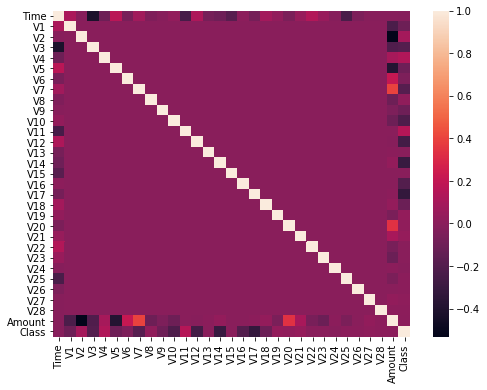

In [20]:
# heat map
a=plt.figure(figsize=(8,6))
sb.heatmap(db.iloc[:].corr())
# we can see significant correlation of variables V10, v14,V17,V12 also it is good to see very less or almost negligible corelation between indpendent variables (maybe due to PCA)

(492, 31)
(284315, 31)
(992, 31)


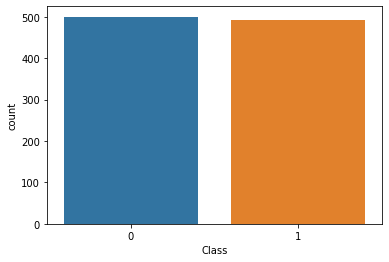

In [21]:
# now lets under sample our data so that fraud vs non-fraud cases are 50:50 split
fraud=db.loc[db.Class==1]
non_fraud=db.loc[db.Class==0]
print(fraud.shape)
print(non_fraud.shape)

# lets say for the sake of discussion we choose 500 cases randomly from non-fraud cases
a=list(np.random.permutation(500))
sub_sample_non_fraud=non_fraud.iloc[a,:]
new=fraud.append(sub_sample_non_fraud)
new=new.iloc[list(np.random.permutation(992)),:]
print(new.shape)
sb.countplot(new['Class'])

# now in below heat map a more clearer picture is presented which shows that variables V1-v18 have significant correlations with each other
#whereas V-19 to V29 are less correlated also we have positive correlation of class V2,V4, V11 which were not visible previously

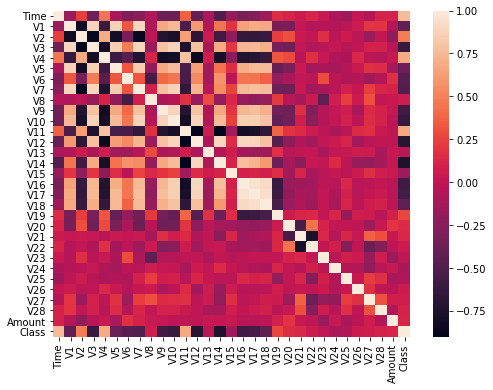

In [22]:
plt.figure(figsize=(8,6))
sb.heatmap(new.iloc[:].corr())

In [23]:
# as above we have seen there are some significant correlation between the set of variables (which means some variables are not independent of each other)
# lets see their VIF score to see the impact of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(new.values,i) for i in range (0,new.shape[1]-1)]
x = pd.Series(vif, index =new.columns[:-1]) 
print(x)
# below it can be seen there are many variables with high VIF.

Time       7.047291
V1        18.076924
V2        23.297733
V3        31.491669
V4        12.963169
V5        26.653324
V6         4.346569
V7        71.804423
V8         7.022224
V9         9.341865
V10       31.411718
V11       13.016121
V12       33.012241
V13        1.222893
V14       22.171128
V15        1.352857
V16       30.957957
V17       34.823193
V18       16.559154
V19        2.575871
V20        3.639264
V21        5.856010
V22        4.209819
V23        2.971402
V24        1.192675
V25        1.579754
V26        1.242418
V27        2.045746
V28        1.664059
Amount     9.347977
dtype: float64


In [24]:
#lets remove highest two VIF variables
vif_drop=new.drop(columns=['V7','V16','V12','V17','V3','V10','V2','V5','V14','V4','V11'])
new.shape
vif_drop.shape
vif=[variance_inflation_factor(vif_drop.values,i) for i in range (0,vif_drop.shape[1]-1)]
x = pd.Series(vif, index =vif_drop.columns[:-1]) 
print(x)

Time      4.898149
V1        3.485008
V6        2.773382
V8        2.552252
V9        4.664143
V13       1.153389
V15       1.169001
V18       4.576835
V19       1.884770
V20       2.478267
V21       5.126531
V22       3.489370
V23       1.595475
V24       1.130318
V25       1.392718
V26       1.108112
V27       1.816067
V28       1.437590
Amount    1.640333
dtype: float64


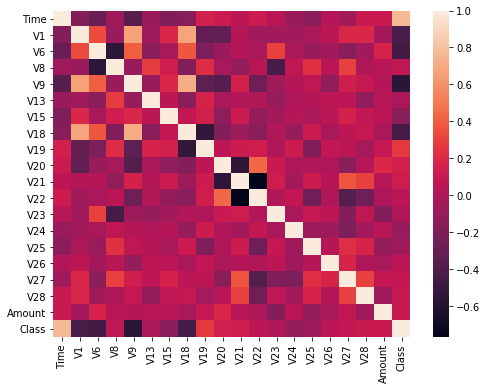

In [25]:
# after successive dropping out variables and computing VIF we come up with final dataframe, now lets see its corr matrix.
plt.figure(figsize=(8,6))
sb.heatmap(vif_drop.corr())

In [26]:
#now lets do logistic regression on new data set
X=vif_drop.iloc[:,:-1].values
Y=vif_drop.iloc[:,-1].values
print(X.shape)
# Y=np.reshape(Y,(Y.shape[0],1))
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

(992, 19)
(992,)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print("Percentange distribtuion of positive class in train "+str(np.sum(y_train==1)*100/y_train.shape[0]))
print("Percentange distribtuion of positive class in test set "+str(np.sum(y_test==1)*100/y_test.shape[0]))


(694, 19)
(298, 19)
(298,)
Percentange distribtuion of positive class in train 50.288184438040346
Percentange distribtuion of positive class in test set 47.986577181208055


In [28]:
logistic=LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)
output=logistic.predict(X_test)
tn, fp, fn, tp = cm(y_test,output).ravel()
print('confusion matrix')
print(np.array([[tp,fp],[fn,tn]]))
print('recall is %f',1.*tp/(tp+fn))
print('precision is %f',1.*tp/(tp+fp))
print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))

confusion matrix
[[142   0]
 [  1 155]]
recall is %f 0.993006993006993
precision is %f 1.0
accuracy is %f 0.9966442953020134


In [29]:
non_fraud.shape

(284315, 31)

In [30]:
#now lets do anamoly detection just shuffling data
fraud=fraud.iloc[list(np.random.permutation(fraud.shape[0])),:]
non_fraud=non_fraud.iloc[list(np.random.permutation(non_fraud.shape[0])),:]

fraud.head(2)
fraud.shape

(492, 31)

In [31]:

#lets now split non fraud data into train val and test set
non_fraud=non_fraud.iloc[:,1:]
X_fraud=non_fraud.iloc[:,:-1]
Y_fraud=non_fraud.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_fraud, Y_fraud, test_size=0.3, random_state=1)

In [32]:
import math
print(X_test.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
print(X_test2.shape)
# now we have train set X_train,y_train and cv set X_train2,y_train 2 and test set X_test2 and y_test2

#lets compute covariance matrix
cov=np.cov(X_train.T)
cov.shape
me= np.array(np.mean(X_train,axis=0))
print(cov.shape)



(85295, 29)
(42648, 29)
(29, 29)


In [33]:
def m_gau(x):
    lik=1/(math.pow((2*math.pi),X_train.shape[1]/2)*np.sqrt(np.linalg.det(cov)))
    ex=np.exp((-0.5)*np.dot(np.dot((x-me),np.linalg.pinv(cov)),((x-me).T)))
    return ex*lik

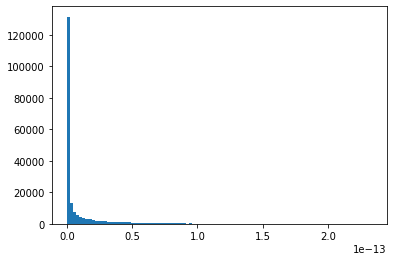

In [34]:
prob=[float(m_gau(x)) for x in X_train.values]
a=plt.hist(prob,bins=100)

In [35]:
print(max(prob))
print(X_test2.shape)
fraud.iloc[0:250,1:-1].shape

2.335768846511694e-13
(42648, 29)


(250, 29)

In [36]:
X_train2=X_train2.append(fraud.iloc[0:250,1:-1])
X_test2=X_test2.append(fraud.iloc[250:,1:-1])
print(X_test2.shape)

(42890, 29)


In [37]:
y_train2=y_train2.append(fraud.iloc[0:250,-1])
y_test2=y_test2.append(fraud.iloc[250:,-1])

In [38]:
y_test2.shape

(42890,)

In [39]:
best_f1=0;
f1=[]
eps=0
output= [m_gau(x) for x in X_train2.values]

In [40]:
for i in np.arange (min(prob),max(prob),max(prob)/50):
    output= np.array([m_gau(x)<=i for x in X_train2.values],dtype=bool)
    tn, fp, fn, tp = cm(y_train2,output).ravel() 
    recall=tp/(tp+fn)
    prec=tp/(tp+fp)
    F1=(2*recall*prec)/(recall+prec)
    f1.append(F1)
    if F1>best_f1:
        best_f1=F1
        eps=i

KeyboardInterrupt: 

In [ ]:
max(f1) # this is the best F-1 score achieved with Gaussian Anamoly detection please 

In [ ]:
# now lets try smoting technique to evaluate recall scores
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=45)

In [ ]:
sm=SMOTE(random_state=41)
rf=RandomForestClassifier(random_state=41)
new_pipeline=make_pipeline(sm, rf)
cross_val_score(new_pipeline, X_train, y_train, scoring='recall', cv=5)






In [47]:
#using imblearn pipelines to do smote analyis with cross-validation set
import imblearn.pipeline as im
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_auc_score

db=pd.read_csv('creditcard.csv')
db.head(5)
X=db.iloc[:,:-1].values 
Y=db.iloc[:,-1].values
print(X.shape)

fraud=db.loc[db.Class==1]
non_fraud=db.loc[db.Class==0]
print(fraud.shape)
print(non_fraud.shape)

# splitting data
vif_drop=db.drop(columns=['V7','V16','V12','V17','V3','V10','V2','V5','V14','V4','V11'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11) #splitting data to do logistic regression

model=NB()
kf=KFold(n_splits=5,random_state=41)
my_pipeline=im.make_pipeline(SMOTE(random_state=12),model)
cross_val_score(my_pipeline, X_train, y_train, scoring='recall', cv=kf)
my_pipeline.fit(X_train, y_train)
pred=my_pipeline.predict(X_test)
recall_score(y_test, pred)
# recall score is better than without smote (66%)

(284807, 30)
(492, 31)
(284315, 31)


C:\Users\17149\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7295597484276729